## TASK 1 - Blob detection
Group Number: 5

### 1. Data import and preparation

Read an input image from your local directory as grayscale and normalize the values between 0 and 1.

In [2]:
%load_ext autoreload
%autoreload 1
%aimport filters, utils
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import numpy as np
import filters
import utils
import cv2

# Adjust size of image plot here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#student_code start
import os
os.makedirs("results", exist_ok=True)

img_path = "data/butterfly.jpg" 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0

# optional
# utils.show_plot(img, group_no="G05", name="task1_input.png")

#student_code end

### 2. Scale Space Creation

Generate the image pyramid using ***get_log_pyramid(..)*** in _filters.py_. Check your results with ***utils.show_plot(..)***

***Submission:*** Save the *third level* of the image scale space of the butterfly as **task1_filtered.png** using ***utils.show_plot(..)***.


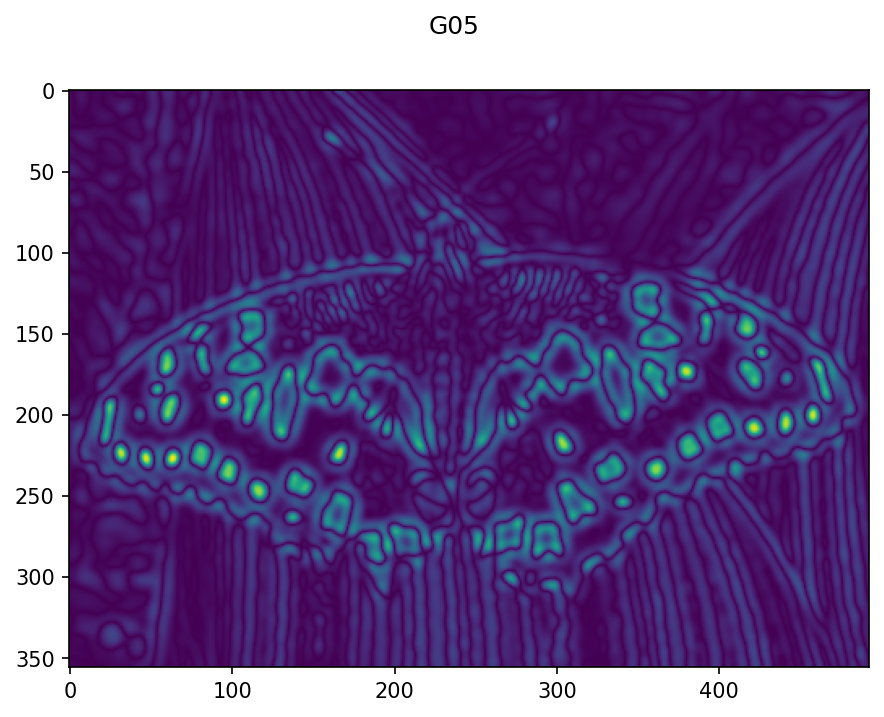

In [4]:
sigma = 2
k = 1.3
levels = 10

#student_code start

log_pyramid, all_sigmas = filters.get_log_pyramid(img, sigma, k, levels)

utils.show_plot(log_pyramid[:, :, 2], group_no="G05", name="task1_filtered.png")

#student_code end

### 2. Blob detection

Perform the first step of the non-maximum suppression by setting the values in the scale space below a certain threshold to zero. Then, look for maxima in a defined local neighbourhood, in this case: the 26-connection. ***skimage.feature.peak_local_max(..)*** is useful to obtain local maxima. Complete method ***utils.show_blobs(..)*** and plot the blobs.


***Submission:*** Save the image including the blobs as **task1_blobs_full.png** (threshold around 0.3).

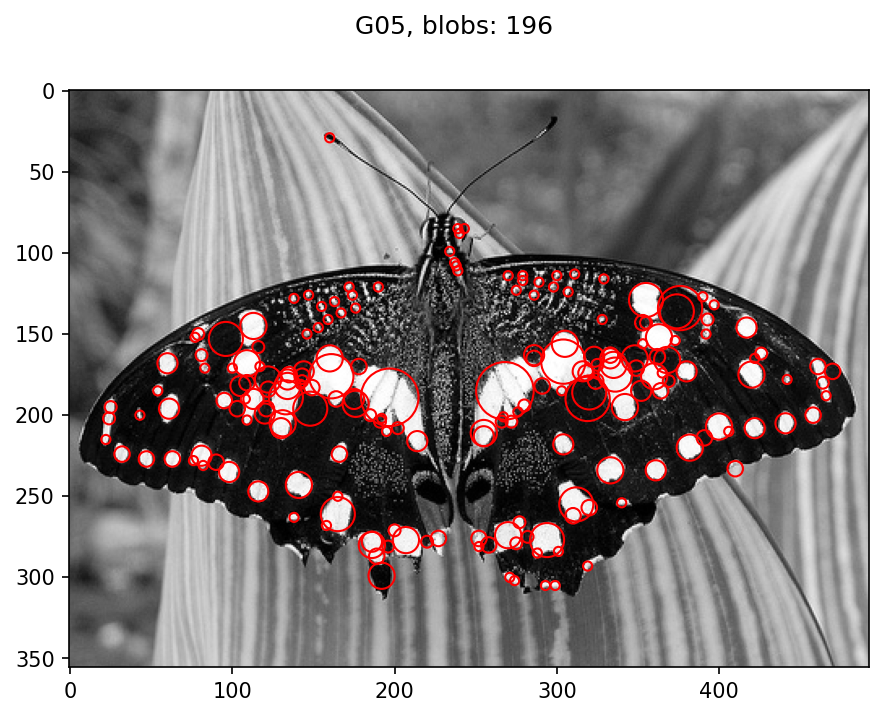

In [ ]:
thres = 0.3

#student_code start
from skimage.feature import peak_local_max

filtered_pyramid = log_pyramid.copy()
filtered_pyramid[filtered_pyramid < thres] = 0.0

peaks = peak_local_max(
    filtered_pyramid,
    threshold_abs=thres,
    footprint=np.ones((3, 3, 3), dtype=bool),
    exclude_border=0
)

utils.show_blobs(img, peaks, all_sigmas, group_no="G05", name="task1_blobs_full.png")
#student_code end


### 3. Evaluation 

Apply the process to a half-sized version of the input image. Plot your results as well with ***utils.show_blobs(..)***.

_***HINT:***_
_cv2.resize(..)_


***Submission:*** Save the result as **task1_blobs_half.png**.

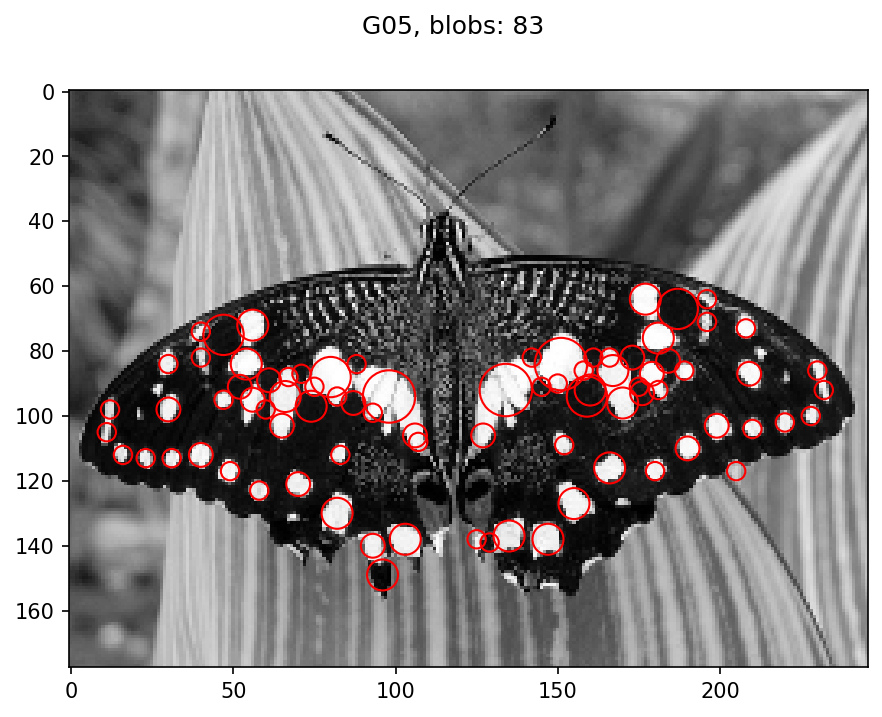

In [21]:
#student_code start

# create half-sized version of image
h, w = img.shape
img_half = cv2.resize(img, (w // 2, h // 2), interpolation=cv2.INTER_LINEAR)


log_pyramid_half, all_sigmas_half = filters.get_log_pyramid(img_half, sigma, k, levels)

filtered_pyramid_half = log_pyramid_half.copy()
filtered_pyramid_half[filtered_pyramid_half < thres] = 0.0

peaks_half = peak_local_max(
    filtered_pyramid_half,
    threshold_abs=thres,
    footprint=np.ones((3, 3, 3), dtype=bool),
    exclude_border=0
)

utils.show_blobs(img_half, peaks_half, all_sigmas_half, group_no="G05", name="task1_blobs_half.png")
#student_code end

*** 
#### Taking a close look at the detected blobs on different image scales, is the method able to find blobs in a scale-invariant way? What could be reasons for observed errors or inaccurately detected blobs? 

The method is not perfectly scale invariant. The reason for this is that rezising might blur or distort blobs, which makes it harder to detect in a scale invarian way (see small blobs after resizing). The limited number of scales results in blobs getting lost between scales. As well, tresholding can surpress some of the blobs in one version but not the other.

#### 3.1 LoG Response

Pick a detected keypoint and plot the response of the LoG for all scales in both image versions. The outcome should be a 2D plot where the x-axis represents the scale of the filter and the y-axis the filter response at the selected keypoint position. 

_***HINT:***_
_plt.plot(..)_

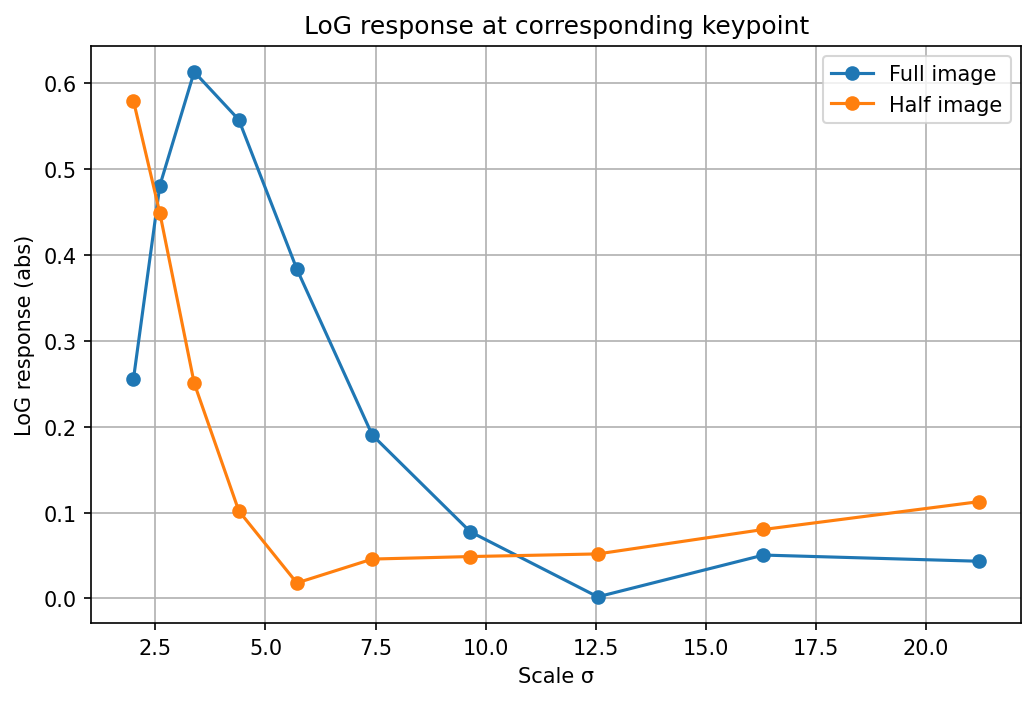

In [23]:
#student_code start
# pick first detected blob in full image
y_full, x_full, level_full = peaks[0]

# 1. response across all scales at that (y,x) in full image
response_full = log_pyramid[y_full, x_full, :]

# 2. map coordinates to half image (roughly)
y_half = int(y_full / 2)
x_half = int(x_full / 2)

# safety: clip coordinates
h_half, w_half = img_half.shape
y_half = np.clip(y_half, 0, h_half - 1)
x_half = np.clip(x_half, 0, w_half - 1)

response_half = log_pyramid_half[y_half, x_half, :]

# 3. Plot
plt.figure()
plt.plot(all_sigmas, response_full, marker='o', label='Full image')
plt.plot(all_sigmas_half, response_half, marker='o', label='Half image')
plt.xlabel("Scale σ")
plt.ylabel("LoG response (abs)")
plt.title("LoG response at corresponding keypoint")
plt.legend()
plt.grid(True)
plt.savefig("results/task1_log_response.png")
plt.show()

#student_code end

*** 
#### Describe and explain the difference between the two LoG response curves.

#ANSWER_HERE

#### 3.2 Own Image

Import an image of your choice and apply the process once again. 


***Submission:*** Save the image including blobs with ***utils.show_blobs(..)*** as: **task1_blobs_own.png**

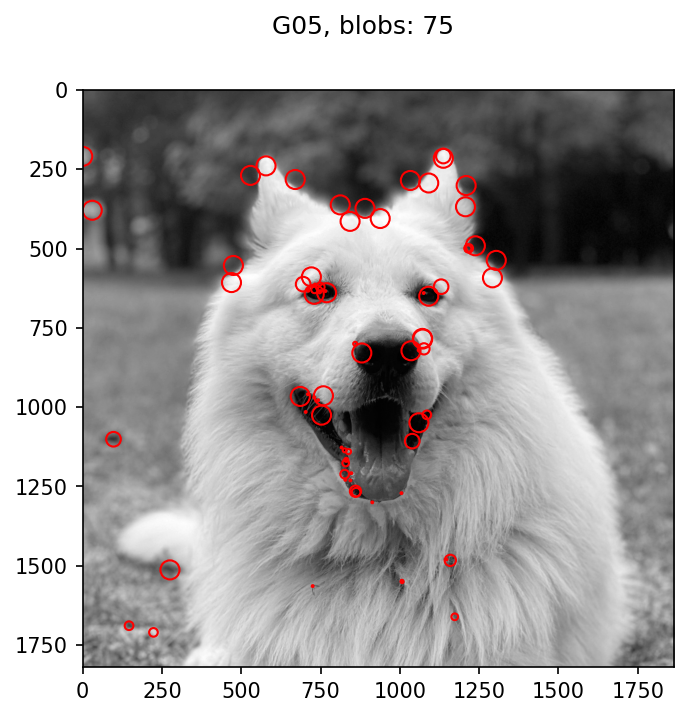

In [35]:
#student_code start
new_img = cv2.imread("data/shepherd.jpeg", cv2.IMREAD_GRAYSCALE)
new_img = new_img.astype(np.float32) / 255.0

log_pyr_new, sigmas_new = filters.get_log_pyramid(new_img, sigma, k, levels)

filtered_pyr_new = log_pyr_new.copy()
filtered_pyr_new[filtered_pyr_new < thres * 0.50] = 0.0

peaks_new = peak_local_max(
    filtered_pyr_new,
    threshold_abs=thres * 0.50,
    footprint=np.ones((3, 3, 3), dtype=bool),
    exclude_border=0
)

utils.show_blobs(new_img, peaks_new, sigmas_new, group_no="G05", name="task1_blobs_own.png")
#student_code end